In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x) 


c:\Users\sande\anaconda3\envs\my_learnings\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


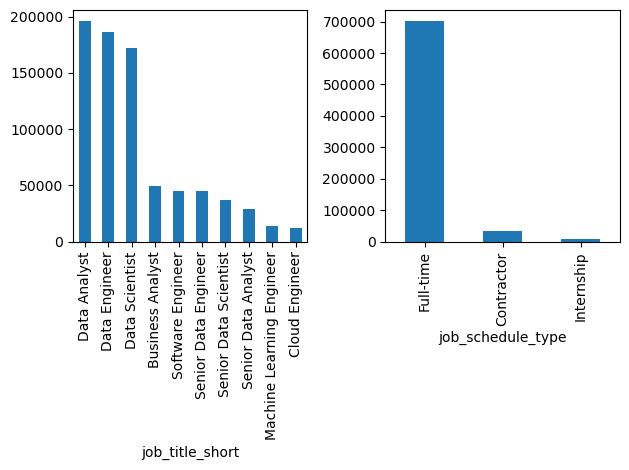

In [2]:
#why subplots? lets say you ploted mutliple plot for the skills required for the Data_analyst, Data_scince, etc and you want to compare all of them
#so you can go back and forth to see all the values of each, but with maltplots pyplot aka plt has a function subplot where you can have multiple 
#graphs at once. 

#we have to use fig, ax as a two variable to then asssing to subplot. Fig. means plot and axis is each individual fig on actual canvas. its just like 
#matlab its like a matrix for ploting. ax is for axis.

#REMEMBER : you need to give two obj. fig, ax industry standatd

fig, ax = plt.subplots(1,2) #here we will have one row and two columns. Therefore, we can have two plots.

df['job_title_short'].value_counts().plot(kind='bar',ax = ax[0]) #Here we are checking no. job posting per job tile. and ploting it. we used plot 
#REMEMBER:anytime you use multiple figures inside the plot command you need to give axis value depending upon where you want to place the other fig.
#to do so inside plot funtion there is a ax= keyword argument (i.e Parameter). Just like you call a coloumns here also you use ax[] and inside the 
#bracket provide you give the number for where you want to plot. (ie, column)

df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[1]) # .Value_count() method groups the similar rows and they counts the each 
                                                                            #occurance for each group then output name and count for diffrenet group

fig.tight_layout()  #we we plottted this we had overlap issues with it so we use fig.tight_layout() to fit in two images correctly without overlapping.



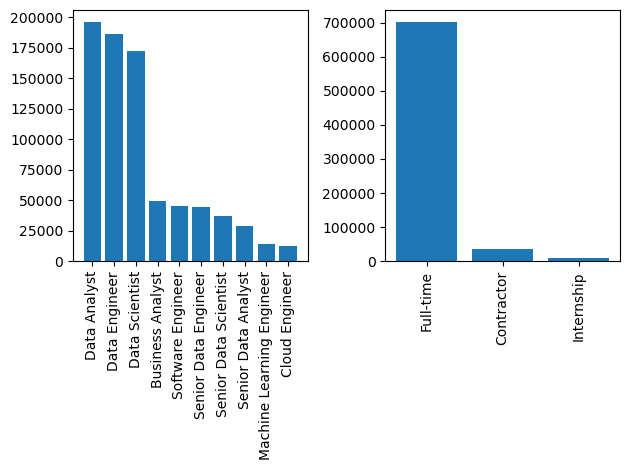

In [ ]:
#same example but with matplot's way of plotting 
#first we need to give 2 obj as std practice

fig, ax = plt.subplots(1,2)

#then we are calling each axis(ie ax[0] ans ax[1]) and for matplot way we use .plot() and inside the bracket we are geting the indexes fo the columns values
#we want to plot then  we are getting the coulumns values counts itself. 

ax[0].bar(df['job_title_short'].value_counts().index, df['job_title_short'].value_counts())
ax[0].tick_params(axis='x', rotation=90)  #to change the orientation of the x axis for better readibility 


ax[1].bar(df['job_schedule_type'].value_counts().head(3).index, df['job_schedule_type'].value_counts().head(3))
ax[1].tick_params(axis='x', rotation=90)


fig.tight_layout()




In [23]:
#now we will plot the top skills in each job roles
#so to do so we need job_titles and job skills. we will get different job roles with groupby and size() to get counts
#but for the job_skills we need to explode that column because it is in  a list and we need to count of each skill, 
# so we will explode the job_skills list.
#then we will do similar, we will groupby job_skills column and do  a size() to get the count.

#since it is in group by it will have multiple index to plot we will make skill count as our index 


df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_title_short','job_skills']).size()

df_skills_count = skills_count.reset_index(name='skill_count')

df_skills_count.sort_values(by='skill_count',ascending=False, inplace=True) #we sorted the values in decending order to get 
#highest to lowest for each roles. in sort_values, you use by= column name to sort by that particular column, 
# ascending= false to sort in hi to low
#inplace= True so we don't need to reassign it to itself to make changes. Inplace will take care of that.

df_skills_count


,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


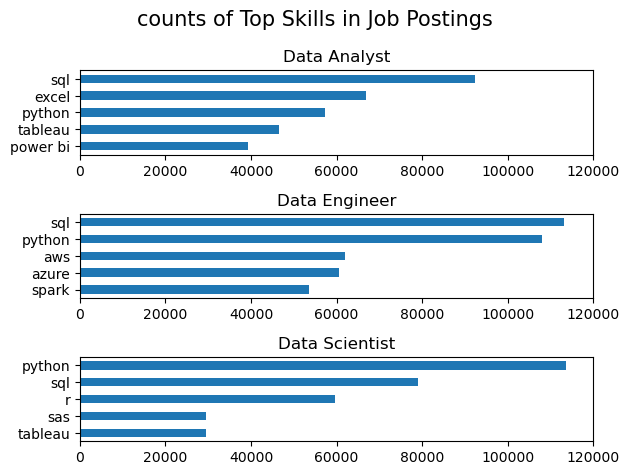

In [24]:
# we want to plot the skills for Data Scientist , Data Engineer, Data Analyst so,
#  we need to creat the list to loop over and get the count of each and plot 


job_role = ['Data Analyst','Data Engineer', 'Data Scientist']

# now we will plot it this 3 roles. to do so we will use for loop to go over each role in th list and pull the count of it.

#we are subplottign it we need to have in one fig. to do so we will be using subplot. we will give 2 obj as std practice 

fig, ax = plt.subplots(3,1)  #just like matirx but here we will have 3 fig in one column. treat like matix of 3x1.count

#now we will run for loop to out list of job role to pull each role one at a time get the counts for each. 
#we are also using the enumerate to get give index to each item so it become easier to plot.
#  #enumerate function gives index and the value of the record.


for i,job_role in enumerate(job_role):  #why we use two variable? because enumeate will get us index and values. we will use index for subplot axis.  
  df_plot = df_skills_count[df_skills_count['job_title_short']== job_role].head(5) #we filtering the data set to just get the list of roles we have. 
  df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i],title= job_role) #REMEMBER give i(ie. index) as axis references.
  ax[i].invert_yaxis() #bcz we want to have the highest postigngs at the top
  ax[i].set_ylabel('')
  ax[i].set_xlim(0,120000)
  ax[i].legend().set_visible(False) #to  disable legend 

fig.suptitle('counts of Top Skills in Job Postings', fontsize= 15)  


fig.tight_layout()
